In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
drivepath = "/content/gdrive/MyDrive/kart/"
csvpath = os.path.join(drivepath, "csv/")  # csv 파일 경로
csvList = sorted( os.listdir(csvpath) )
print(csvList)

['kart_test.mp4.csv']


In [4]:
csvFile = os.path.join(csvpath, csvList[0])
print(csvFile)

/content/gdrive/MyDrive/kart/csv/kart_test.mp4.csv


단순한 입력 카운트 비율

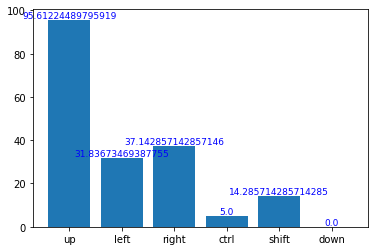

In [5]:
df = pd.read_csv(csvFile, names=["filename", "input"], dtype={"filename": str, "input": str})

labels = ["up", "left", "right", "ctrl", "shift", "down"]
key_counts = np.zeros(6)

for input in df["input"]:
  for idx in range(6):
    if '1' == input[idx]:
      key_counts[idx] += 1

#plt.pie(key_counts, labels = labels, startangle = 90, autopct = "%0.1f %%")

key_counts = key_counts / len(df) * 100

plt.bar(labels, key_counts)
for i, v in enumerate(labels):
  plt.text(v, key_counts[i], key_counts[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
            fontsize = 9, 
            color='blue',
            horizontalalignment='center',  # horizontalalignment (left, center, right)
            verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

x축: 프레임

y축: 누적 카운트

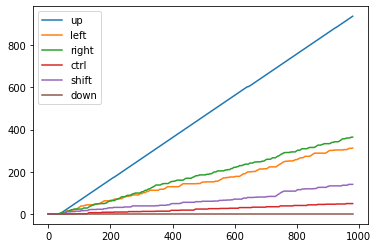

In [6]:
df = pd.read_csv(csvFile, names=["filename", "input"], dtype={"filename": str, "input": str})

labels = ["up", "left", "right", "ctrl", "shift", "down"]
key_counts = [[0], [0], [0], [0], [0], [0]]

for input in df["input"]:
  for idx in range(6):
    if '1' == input[idx]:
      key_counts[idx].append(key_counts[idx][-1] + 1)
    else:
      key_counts[idx].append(key_counts[idx][-1])

for idx in range(len(labels)):
  plt.plot(range(len(df)+1), key_counts[idx], label=labels[idx])
plt.legend()
plt.show()

x축: 프레임

y축?: 키 입력 여부

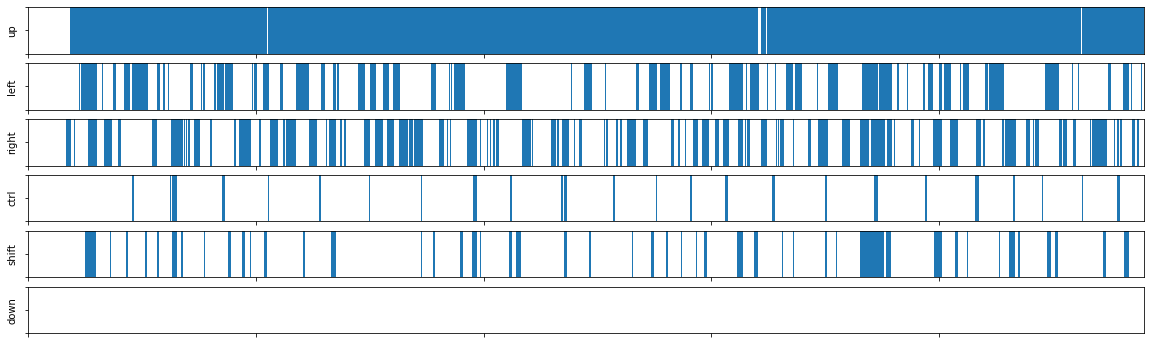

In [7]:
df = pd.read_csv(csvFile, names=["filename", "input"], dtype={"filename": str, "input": str})

labels = ["up", "left", "right", "ctrl", "shift", "down"]
key_counts = [[], [], [], [], [], []]

for input in df["input"]:
  for idx in range(6):
    if '1' == input[idx]:
      key_counts[idx].append(1)
    else:
      key_counts[idx].append(0)

plt.rcParams['figure.figsize'] = [20,6]
fig = plt.figure()

ax = []
for idx in range(6):
  ax.append(fig.add_subplot(6, 1, idx+1))
  #ax[idx].axes.xaxis.set_visible(False)  # ticks  label 다 제거
  #ax[idx].axes.yaxis.set_visible(False)
  ax[idx].axes.xaxis.set_ticklabels([])  # ticks 제거
  ax[idx].axes.yaxis.set_ticklabels([])
  ax[idx].bar(range(len(df)), key_counts[idx], width=1.0)
  ax[idx].set_ylabel(labels[idx])
  ax[idx].set_xlim(0, len(df))                 # x축 범위
  ax[idx].set_ylim(0, 1)                       # y축 범위

plt.show()